### САМОСТОЯТЕЛЬНАЯ РАБОТА. АНСАМБЛИ. СТОХАСТИЧЕСКИЕ МОДЕЛИ
Москаленко Андрей

### Step 1

In [2]:
!python rf.py -tr spam.train.txt -te spam.test.txt

Figure(800x800)
             precision    recall  f1-score   support

        0.0    0.62069   0.83227   0.71107      2033
        1.0    0.95348   0.87112   0.91044      8023

avg / total    0.88620   0.86327   0.87014     10056
final score    0.78708   0.85169   0.81076     10056



### Step 2

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from rf import classification_report, visualize_data

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [52]:
train_data = np.loadtxt("spam.train.txt")
test_data  = np.loadtxt("spam.test.txt")

In [53]:
X_train, y_train = train_data[0::, 1::], train_data[0::, 0]
X_test, y_test = test_data[0::, 1::], test_data[0::, 0]

In [54]:
classifiers = [
    RandomForestClassifier(),
    CatBoostClassifier(verbose=0),
    AdaBoostClassifier(),
    SVC(),
    SGDClassifier()
    ]

In [57]:
from sklearn.metrics import f1_score

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('----------------------------------------------------------')
    print(type(clf).__name__)
    print(classification_report(y_test, y_pred))

----------------------------------------------------------
RandomForestClassifier
             precision    recall  f1-score   support

        0.0    0.79865   0.93261   0.86045      2033
        1.0    0.98217   0.94042   0.96084      8023

avg / total    0.94507   0.93884   0.94054     10056
final score    0.89041   0.93652   0.91064     10056

----------------------------------------------------------
CatBoostClassifier
             precision    recall  f1-score   support

        0.0    0.94459   0.87211   0.90691      2033
        1.0    0.96821   0.98704   0.97753      8023

avg / total    0.96344   0.96380   0.96325     10056
final score    0.95640   0.92957   0.94222     10056

----------------------------------------------------------
AdaBoostClassifier
             precision    recall  f1-score   support

        0.0    0.92297   0.64830   0.76163      2033
        1.0    0.91713   0.98629   0.95045      8023

avg / total    0.91831   0.91796   0.91228     10056
final score 

CatBoostClassifier победил!

### Step 3

In [102]:
import pandas as pd
import seaborn as sn
import tqdm

In [103]:
df = pd.DataFrame(columns=list(range(128, 2049, 128)), index=["auto", "sqrt", "log2", "None"])

In [104]:
for n_estimators in tqdm.notebook.tqdm(list(range(128, 2049, 128))):
    for max_features in ["auto", "sqrt", "log2", None]:
        clf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, n_jobs=-1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        df[n_estimators][max_features if max_features is not None else "None"]= f1_score(y_test, y_pred)

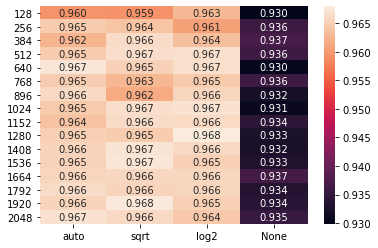

In [105]:
sn.heatmap(df.astype('float64').T, fmt=".3f", annot=True)
plt.show()

### Step 4

Классы не сбалансированы - примеров спама больше, поэтому качество на этом классе больше